
# Advertising_Sales_Channel_Project :- DataTrained | Practice Project_6

### Problem Statement:
##### Advertising Sales Channel Prediction Case Study
###### SHAHLA M 

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.


### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Import data from github and start the preprocessing steps:

In [2]:
# taking data from the given link on Github

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9



### No need to keep Unnamed: 0, let's drop it permanently.

In [3]:
data.drop(columns='Unnamed: 0', inplace=True)

# checking shape

data.shape



(200, 4)


#### Observation:

This dataset contains 200 rows & 4 columns.

### Checking Null:

In [4]:
#checking null values

data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

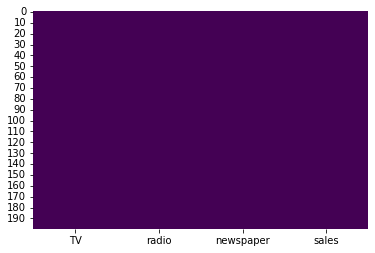

In [5]:


sns.heatmap(data.isnull(),cbar=False,cmap = 'viridis')




#### Observations:

  1. No null values are present.

### Checking duplicate:-

In [6]:
#checking duplicate

data.duplicated().sum()

0


#### Observations:

No duplicate rows are present in the dataset.

### Checking different statistical parameter:

In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB



#### Observations:

  1. No null values are present.
  2.  All of the features are numarical data.
  3. Target variable is 'sales' and it is a continuous data. So it is a      Regression problem.
  4.  For 'Radio' column, min value is 0.
  5.  Seems some skewness and outliers are present as there is a big jump    between quantile and max value of 'newspaper' column.
  6.  For 'TV' std is very high.




### EDA :
### Univariate Analysis:

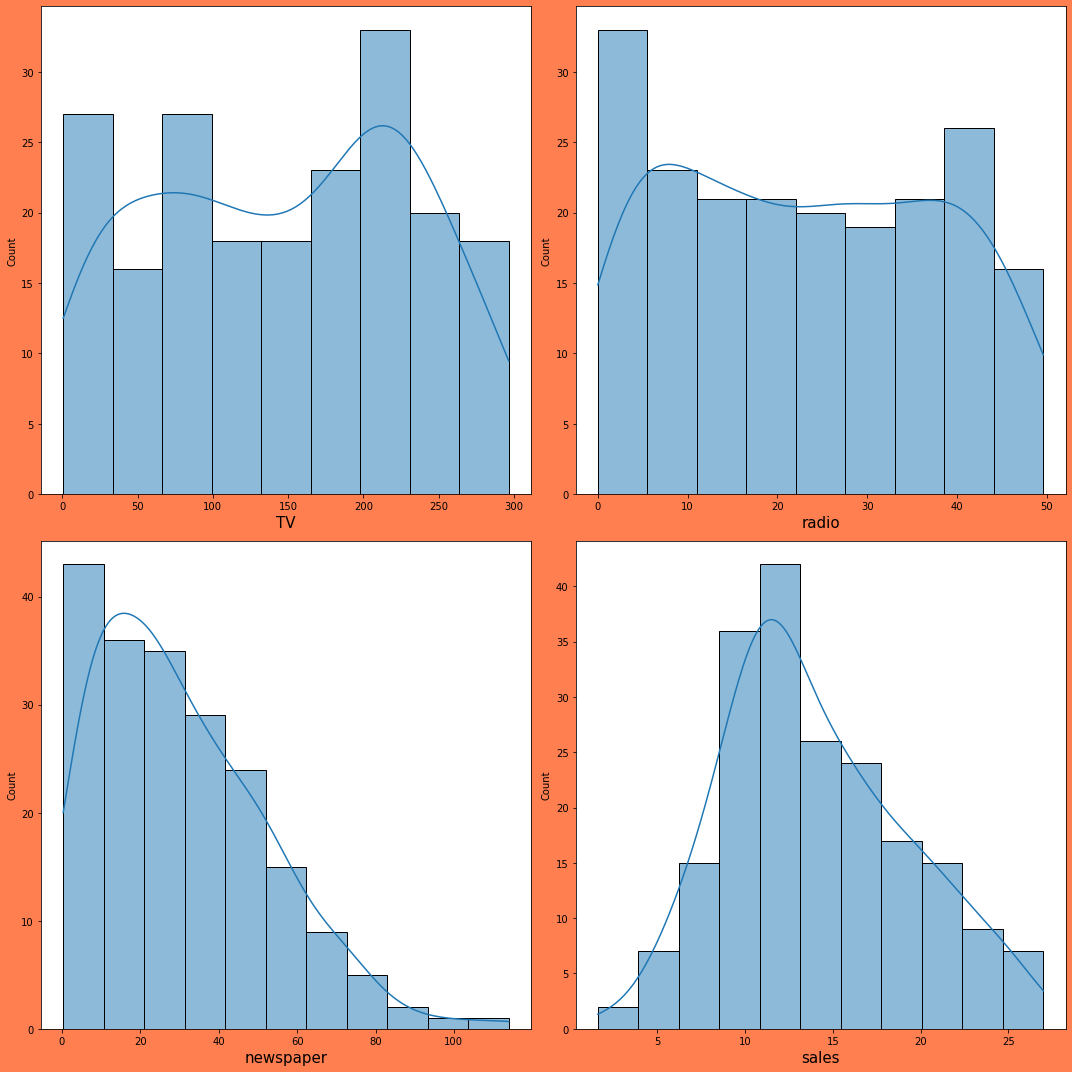

In [9]:
plt.figure(figsize=(15,15),facecolor='coral', frameon = True )
plno=1
for x in data:
    if plno<=4:
        plt.subplot(2,2,plno)
        sns.histplot(data[x], kde=True)
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

### Observations:

The features are not normally distributed
Check different features reletionship with lables:

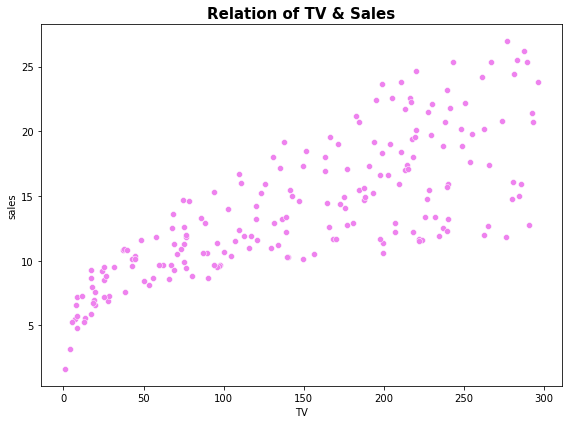

In [10]:
plt.subplots(figsize=(8,6))
sns.scatterplot(x = "TV",y = "sales", data = data, color= 'violet')
plt.title('Relation of TV & Sales',fontsize=15, fontweight='bold')
plt.tight_layout()

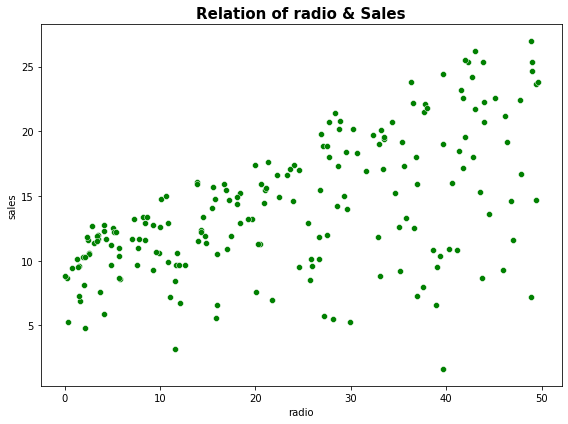

In [11]:
plt.subplots(figsize=(8,6))
sns.scatterplot(x = "radio",y = "sales", data = data, color= 'green')
plt.title('Relation of radio & Sales',fontsize=15, fontweight='bold')
plt.tight_layout()

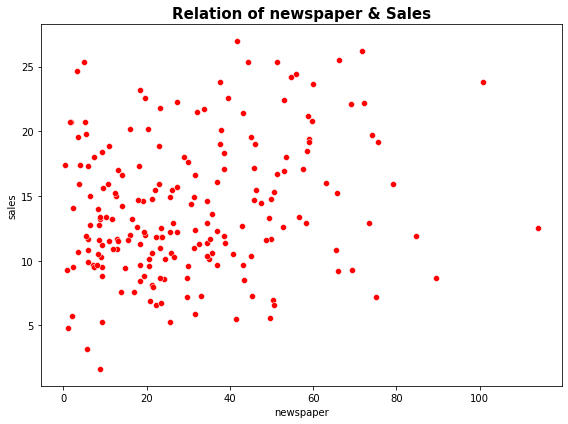

In [12]:
plt.subplots(figsize=(8,6))
sns.scatterplot(x = "newspaper",y = "sales", data = data, color= 'red')
plt.title('Relation of newspaper & Sales',fontsize=15, fontweight='bold')
plt.tight_layout()


### Observations:

As is visible from the above graph between different features with lable that,

 1.   TV seems to be most correlated with sales.

 2.   radio has also correlation with sales.

 3. newspaper seems to be not correlated with sales.

### Bivariate Analysis:

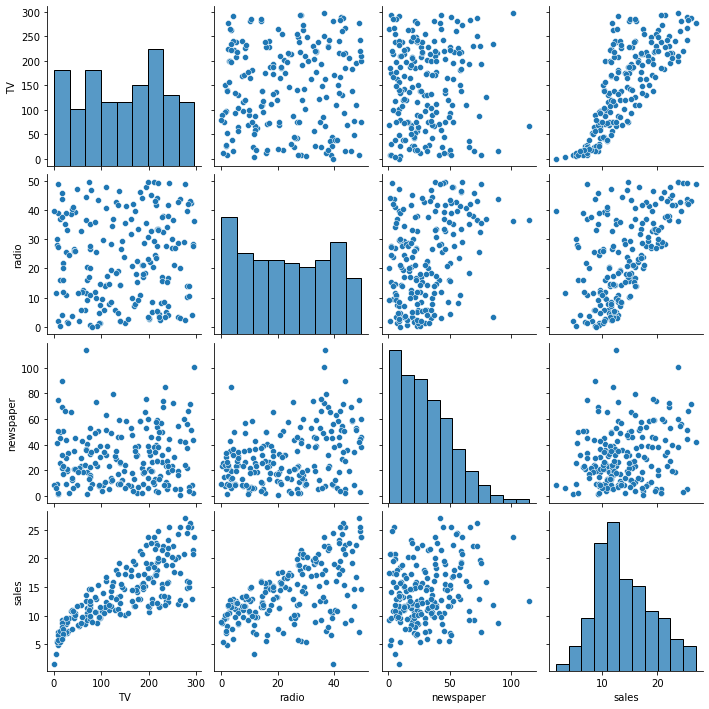

In [13]:
sns.pairplot(data)
plt.show()

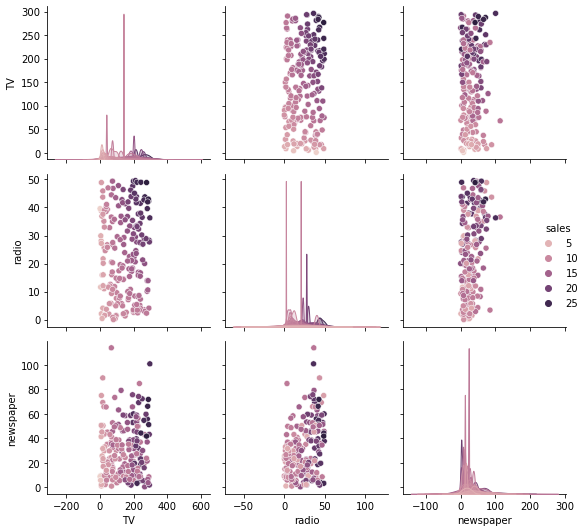

In [14]:
sns.pairplot(data, hue= "sales", kind= 'scatter')
plt.tight_layout()
plt.show()

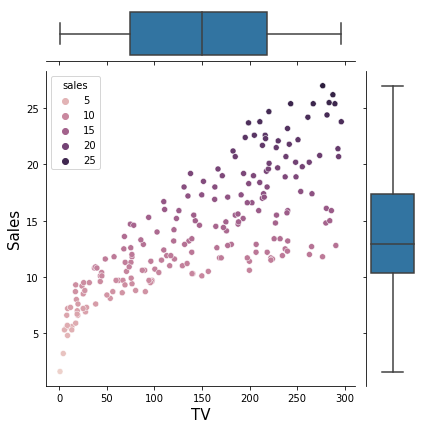

In [15]:
ax= sns.JointGrid(x= "TV", y= "sales", hue= "sales", data= data)
ax.plot(sns.scatterplot, sns.boxplot)
ax.set_axis_labels(xlabel='TV', ylabel='Sales', fontsize=15)
plt.show()

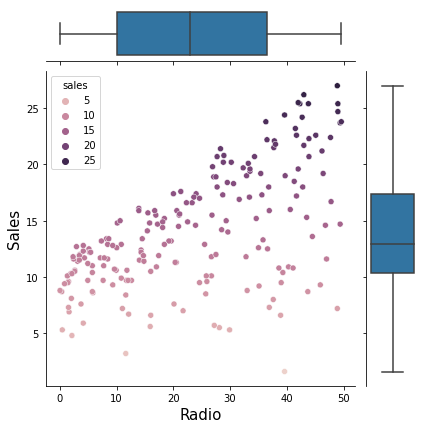

In [16]:
ax= sns.JointGrid(x= "radio", y= "sales", hue= "sales", data= data)
ax.plot(sns.scatterplot, sns.boxplot)
ax.set_axis_labels(xlabel='Radio', ylabel='Sales', fontsize= 15)
plt.show()

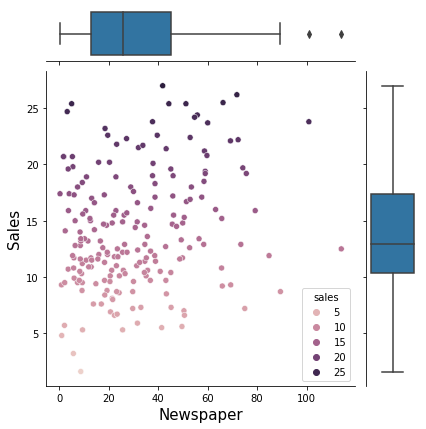

In [17]:
ax= sns.JointGrid(x= "newspaper", y= "sales", hue= "sales", data= data)
ax.plot(sns.scatterplot, sns.boxplot)
ax.set_axis_labels(xlabel='Newspaper', ylabel='Sales', fontsize= 15)
plt.show()

### Correlations:

In [18]:


data.corr()



,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


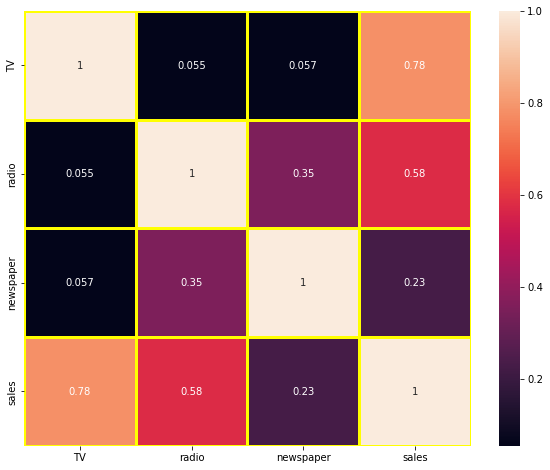

In [19]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()


### Observations:

From the above bivariate analysis, heatmap, scatterplot the conclusion is:

There is no such relation between newspaper & sales and the highest relationship is TV & sales.

### Checking Outliers:

From the above plots, it is seemd that the outliers present in the "Newspaper" column.

Let's check it.


In [20]:


data.skew()



TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [21]:
#1st quantile
q1= data. quantile(0.25)
#3rd quantile
q3= data. quantile(0.75)
#IQR
iqr= q3-q1

In [22]:
# determine higher value (newspaper_h) from newspaper column using IQR 

newspaper_h=(q3.newspaper+(1.5*iqr.newspaper))

# Extract the index no of the data for which the newspaper value is higher than newspaper_h

index=np.where(data['newspaper'] >newspaper_h)

#Drop the data with the specified index number

data=data.drop(data.index[index])

#Reset the index number

data.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5



### Observation:

For newspaper 2 datas are in outliers.

Remove it and reset the index.

### Check Multicollinearity problem:

In [23]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x = data.drop(columns = ['sales'], axis=1)
y = data['sales']

x_scale= scaler.fit_transform(x)
x_scale.shape

(198, 3)

In [24]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x_scale,i)for i in range(x_scale.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper



### Observations:

Reject the features for which the VIF value is greater than 5.

Let's keep all the features.

### Data Normalization:

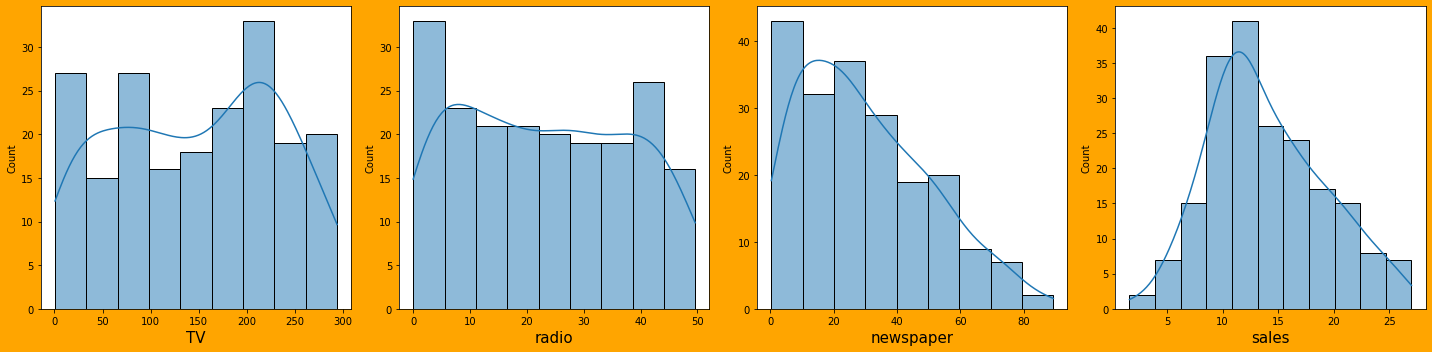

In [25]:
plt.figure(figsize=(20,5),facecolor='orange', frameon = True )
plno=1
for x in data:
    if plno<=4:
        plt.subplot(1,4,plno)
        sns.histplot(data[x], kde=True)
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()


#### By BoxCox:

In [26]:
from scipy.stats import boxcox
data['newspaper']=boxcox(data['newspaper'],0.5)

data.skew()



TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

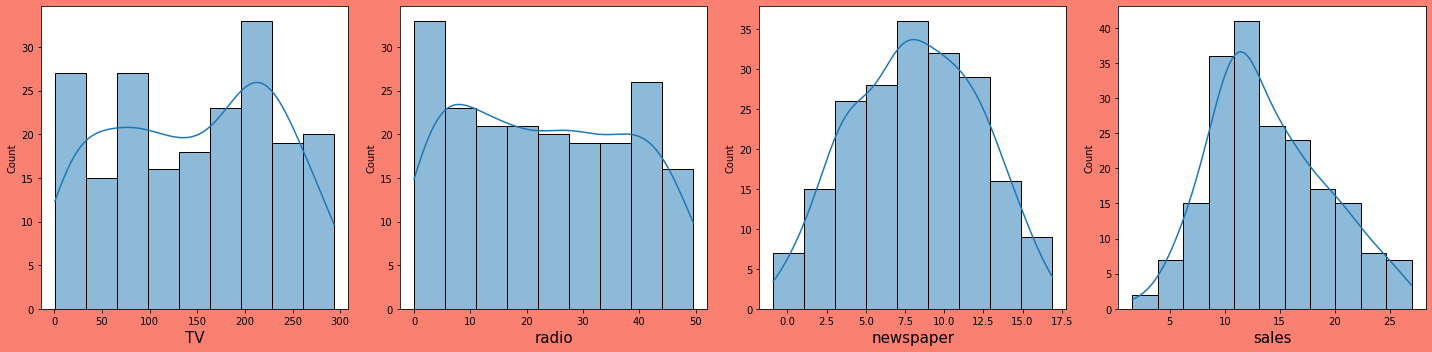

In [27]:
plt.figure(figsize=(20,5),facecolor='salmon', frameon = True )
plno=1
for x in data:
    if plno<=4:
        plt.subplot(1,4,plno)
        sns.histplot(data[x], kde=True)
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()


### Data Standarization:

In [28]:
#seperate Features(x) and Lable(y)

x=data.drop(columns=['sales'])
y=data['sales']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#data standarization

x_scale= scaler.fit_transform(x)


### Final predictions using different Regression ML Models:
##### Find best Random state:

In [29]:
from sklearn.linear_model import LinearRegression


r2_max=0
random_max=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.9499160253751924 on Random_state 444


In [30]:


print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)



Training feature shape: (148, 3)
Training target shape: (148,)
Test feature shape: (50, 3)
Test target shape: (50,)



### Using LinearRegression()

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=444)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9499160253751924
Mean absolute error: 0.9311174482205788
Mean square error: 1.3570120702898618
Root mean square error: 1.1649086102737252



### Using GridSearchCV:

In [32]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)

GridSearchCV(cv=9, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'], 'n_jobs': [1, -1]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [33]:
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [34]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9499160253751924
Mean absolute error: 0.9311174482205788
Mean square error: 1.3570120702898618
Root mean square error: 1.1649086102737252



#### Observations:

No such improvement seen after GridSearchCV.

### Using DecisionTreeRegressor():

In [35]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9290932378894557
Mean absolute error: 1.056
Mean square error: 1.9212
Root mean square error: 1.3860735911198943



### Using GridSearchCV:

In [36]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : range(15,30),
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,4)}

grid_search = GridSearchCV(estimator = dt,cv=9,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [37]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9223243954102376
Mean absolute error: 1.126
Mean square error: 2.1045999999999996
Root mean square error: 1.4507239572020583



Observations:

MAE is improved after GridSearchCV.

### Using KNeighborsRegressor():

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(1, 10):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  2 is: 1.5939730236111276
RMSE value for k=  3 is: 1.3692414769580354
RMSE value for k=  4 is: 1.186928809996623
RMSE value for k=  5 is: 1.2367958602776772
RMSE value for k=  6 is: 1.2357319018837916
RMSE value for k=  7 is: 1.2229522659932233
RMSE value for k=  8 is: 1.2555203104689305
RMSE value for k=  9 is: 1.2914830215925128
RMSE value for k=  10 is: 1.2955817226250146


In [39]:


min(rmse_val)

1.186928809996623


#### For k=4 we get the best RMSE value for KNeighborsRegressor()

In [40]:
knn =KNeighborsRegressor(n_neighbors= 4)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9480046603886453
Mean absolute error: 0.9070000000000001
Mean square error: 1.4087999999999996
Root mean square error: 1.186928809996623


### Using GridSearchCV

In [41]:
param = {'algorithm' : ['kd_tree','brute'],
             'leaf_size' : [30,12,15,34,10], 'n_jobs':[1,-1],
             'n_neighbors' : [4],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=9)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'kd_tree', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 4, 'weights': 'distance'}


In [42]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9449196385643719
Mean absolute error: 0.8936584300583632
Mean square error: 1.4923878518829248
Root mean square error: 1.2216332722560093



Observations:

Nothing is improved after GridSearchCV.

### Using RandomForestRegressor():

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9753688657457301
Mean absolute error: 0.6238399999999998
Mean square error: 0.6673740799999994
Root mean square error: 0.8169296664952249



### Using GridSearchCV:

In [44]:
params = {'n_estimators' : [100,110,80], 'criterion' : ["squared_error", "absolute_error"], 
          'min_samples_split' : [3,2,1], 'n_jobs': [1,-1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'absolute_error', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'n_jobs': 1}


In [45]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.978310356484005
Mean absolute error: 0.5682099999999997
Mean square error: 0.5876751649999972
Root mean square error: 0.7665997423688565



Observations:

r2 score, RMSE slightly improved after GridSearchCV.

### Using Support Vector Regression():

In [46]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.918937251059194
Mean absolute error: 0.9067262475516116
Mean square error: 2.196373781985419
Root mean square error: 1.4820167954464682


### Using GridSearchCV:

In [47]:
params = {'kernel':['rbf','linear', 'poly'], 'gamma':['scale', 'auto'],'C':[1.0,10,100, 0.5,0.1,0.001] }

svr_grd = GridSearchCV(svr, param_grid = params, cv= 9)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [48]:
# best params :  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

svr_best = svr_grd.best_estimator_
svr_best.fit(x_train, y_train)

y_pred = svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9898358831399549
Mean absolute error: 0.4392724507876874
Mean square error: 0.2753940629960726
Root mean square error: 0.524780013906849



Observations:

r2 score, RMSE are improved after GridSearchCV.

### Using GradientBoostingRegressor()

In [49]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9822210639148364
Mean absolute error: 0.5493549121069173
Mean square error: 0.4817155795883805
Root mean square error: 0.6940573316292974


##### Using GridSearchCV:

In [50]:
params = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'n_estimators':[100,150,80],
          'criterion':['friedman_mse', 'squared_error', 'mse'], 'min_samples_leaf':range(1,5),
         'max_features': ['auto', 'sqrt', 'log2']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'criterion': 'friedman_mse', 'loss': 'huber', 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 80}


In [51]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9835474971117683
Mean absolute error: 0.5104602800387019
Mean square error: 0.4457762222958753
Root mean square error: 0.6676647529231083



Observations:

r2 score, RMSE are not improved after GridSearchCV.

### Using AdaBoostRegressor():

In [52]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9385747135611776
Mean absolute error: 1.014879495398708
Mean square error: 1.6643019197842732
Root mean square error: 1.2900782611083226



#### Using GridSearchCV:

In [53]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.5] ,
        'n_estimators':[50,90,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 90}


grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


#### Observations:

r2 score, RMSE are not improved after GridSearchCV.
As per 7 different regression model we can see the the model with maximum R2 score and minimum RMSE value is Support Vector Regression().

Let's check the cross validation score before final prediction.

### Cross Validation:

In [54]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , knn , grid_rf_best , svr_best , gbdt, ada]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [0.86876067 0.91358788 0.89512333 0.93158231 0.79167006 0.87126896
 0.91628722]

Mean CV Score : 0.8840400627916499

Std deviation : 0.043465643458005944

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(max_depth=19, splitter='random')

 Cross Validation Score :  [0.95136004 0.94803014 0.95202081 0.90045975 0.92389976 0.96411191
 0.93808652]

Mean CV Score : 0.9397098484065066

Std deviation : 0.01980309837623781

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=4)

 Cross Validation Score :  [0.93283586 0.94348688 0.96590304 0.971682   0.88966264 0.9027058
 0.96061405]

Mean CV Score : 0.9381271822802804

Std deviation : 0.029431019371648853

-----------
-----------
Cross Validation Score of : RandomForestRegressor(criterion='absolute_error', min_samples_split=3, n_jobs=1)

 Cross Validation Score :  [0.97962966 0.98504858 0.98280276 0.97239775 0.9683


### Checking overfitting problem:

In [55]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

0.0740078814265686

In [56]:


lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))



Score after applying LASSO regression on the model is : 0.9469102971480701


In [57]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.011099999999999999

In [58]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.9499077914827962



#### Conclusion:
As per 7 different regression model we can see the the model with maximum Mean CV Score is 0.9844903433598154 and it is for SVR()
#### Our final model is SVR() for this particular dataset
### Final Model:

In [59]:
y_pred = svr_best.predict(x_test)
y_pred

array([ 9.69017141, 17.58992711, 21.95946504, 21.72302558, 20.8217576 ,
       19.9564278 , 16.27143673,  9.41657553,  9.21901531, 14.52188495,
       24.06395977,  8.49926889, 10.33509764, 20.72913953, 12.78480014,
        6.41440337, 20.02168272, 23.03175661, 10.28142551, 17.86017598,
       14.46873971, 21.02812833, 15.99241557, 16.76369439, 12.37798233,
       18.67582549, 11.77151318,  9.88460756,  8.71756822, 26.16696282,
       12.40838292, 16.08729646, 25.10782771, 13.33167363, 13.62503512,
        6.4208704 ,  9.49087288,  6.80431672, 13.15617995, 18.20347335,
        7.90028867, 14.0112815 , 14.04054718, 11.42287167, 14.63944371,
        9.82824152, 10.92685485, 20.26503726, 12.67296925,  6.95830234])

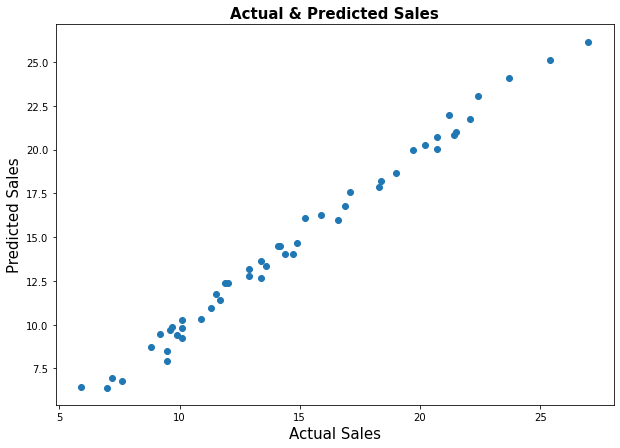

In [60]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", fontsize= 15)
plt.ylabel("Predicted Sales",fontsize= 15)
plt.title("Actual & Predicted Sales" , fontsize= 15, fontweight= 'bold')
plt.show()

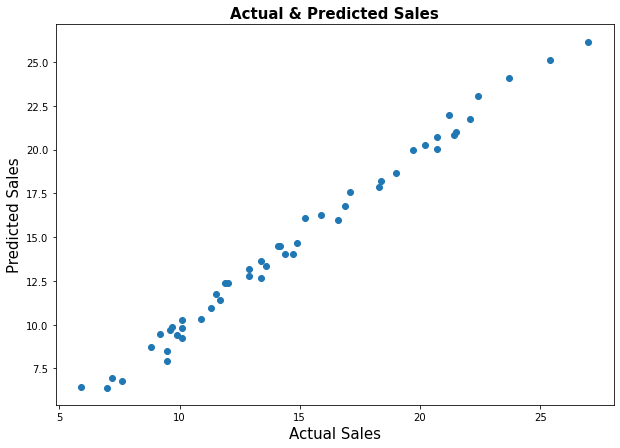

In [61]:


# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", fontsize= 15)
plt.ylabel("Predicted Sales",fontsize= 15)
plt.title("Actual & Predicted Sales" , fontsize= 15, fontweight= 'bold')
plt.show()



In [62]:


print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))



Final R2 Score: 0.9898358831399549

Final Mean absolute error: 0.4392724507876874

Final Mean square error: 0.2753940629960726

Final Root mean square error: 0.524780013906849


### Best Feature Selection:

Text(0.5, 0, 'Permutation Importance')

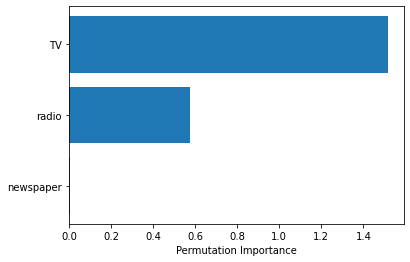

In [63]:
from sklearn.inspection import permutation_importance

svr_best.fit(x_train, y_train)

perm_importance = permutation_importance(svr_best, x_test, y_test)

feature_names = ['TV', 'radio', 'newspaper']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


#### Observations:

TV is the best feature during model building

### Load and save the model

Now , let's save the model for future use.


In [64]:
import pickle
pickle.dump(svr_best, open("Sales_Prediction_model", "wb"))
load_Sales_Prediction_model= pickle.load(open("Sales_Prediction_model", "rb"))

In [65]:
y_pred = load_Sales_Prediction_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
45,9.828242,10.1
13,20.729140,20.7
28,8.717568,8.8
31,16.087296,15.2
3,21.723026,22.1
1,17.589927,17.1
